In [1]:
import sys
sys.path.append(r'..//')
from ioMicro import *

In [2]:
sys.path.append(os.path.abspath('Human'))
from workerScope3A_HttHuman_Snonia__06_12_2023 import *

Loaded decoded: -0.40445494651794434


True

In [20]:
complete = dec.check_is_complete()
#if complete==0 or redo:
dec.get_XH(fov,set_,ncols=2,nbits=12)#number of colors match 
dec.XH = dec.XH[dec.XH[:,-4]>0.25] ### keep the spots that are correlated with the expected PSF for 60X
dec.load_library(lib_fl = lib_fl,nblanks=-1)


Completed


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:07<00:00,  1.84it/s]


In [28]:
#np.unique(dec.XH[:,-1],return_counts=True)
#dec.gns_names

In [29]:
dec.get_inters(dinstance_th=2,enforce_color=True)# enforce_color=False
dec.get_icodes(nmin_bits=4,method = 'top4',norm_brightness=None,nbits=24,is_unique=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [01:02<00:00, 31.47s/it]


Unfolded molecules: 20.183656930923462
Computed the decoding: 23.544986248016357


100%|█████████████████████████████████████████████████████████████████████| 3904203/3904203 [00:40<00:00, 95874.40it/s]


Computed best unique assigment: 41.35696721076965


In [32]:
dec.XH_pruned.shape

(881342, 4, 10)

Loaded decoded: -0.35633420944213867


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 17.30it/s]


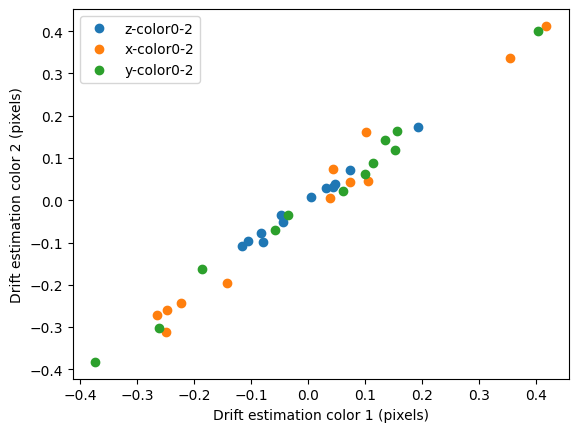

In [11]:
save_folder =r'\\192.168.0.127\Raw_data\Roy\HumanSVZMER_6_26_2023\MERFISH_Analysis_group1'
fov,set_ = 'Conv_zscan__225', '_set1'
dec = decoder_simple(save_folder,fov,set_)
dec.ncols=2
dec.load_decoded()
apply_fine_drift(dec,plt_val=True)

In [12]:
scoresRefT = get_score_per_color(dec)

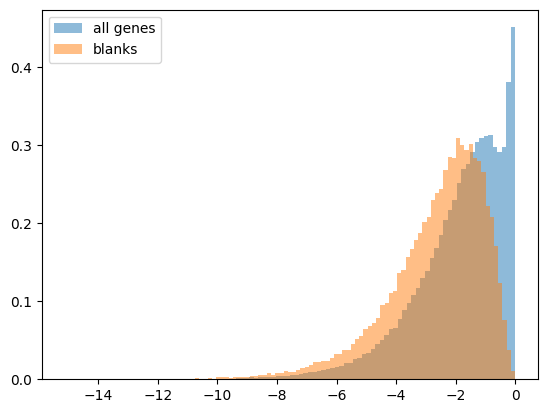

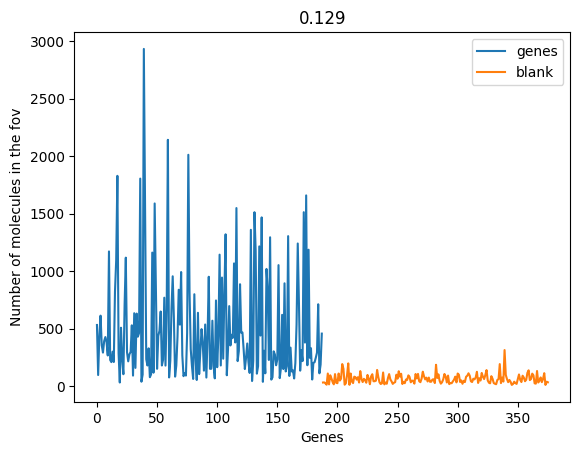

In [13]:
get_score_withRef(dec,scoresRefT,plt_val=True,gene=None,iSs = None)
dec.th=-1.5
plot_statistics(dec)

In [15]:
viewer = plot_multigenes(dec,genes=['AQP4','NCAM2','ELAVL4'],colors=['r','g','b','m','c','y','w'],viewer = None,
                         smin=2,smax=20)

In [14]:
icds,ncds = np.unique(dec.icodesN[dec.scoreA>dec.th],return_counts=True)
print(list(np.array(dec.gns_names)[icds[np.argsort(ncds)[::-1]]]))

['CD74', 'CNTNAP4', 'DSG3', 'AQP4', 'CBX5', 'NEAT1', 'CHMP1A', 'CDH13', 'HOXD8', 'ISG20', 'NCAM2', 'KCNIP2', 'IPO5', 'GSX1', 'LRIG3', 'KPNB1', 'MOBP', 'KCNC2', 'NEFM', 'ISX', 'AKAP6', 'CETN2', 'GLIS3', 'BCAS1', 'APLP2', 'HOXA7', 'LINC01107', 'KLHL1', 'CYP4B1', 'COLEC12', 'FILIP1L', 'GRIA1', 'LMNTD1', 'HS6ST3', 'CHMP2A', 'KPNA1', 'CSF1R', 'APBB1IP', 'DST', 'GRM5', 'ELAVL4', 'CLEC5A', 'FZD7', 'MRC1', 'NRM', 'B2M', 'HHIPL1', 'COL20A1', 'CNR1', 'CHRFAM7A', 'EPHA6', 'CA10', 'CAPN2', 'LMNA', 'ACTC', 'CP', 'FREM2', 'FBN2', 'CXCL14', 'MLIP', 'AARD', 'C1QL3', 'ATOH8', 'FAM150B', 'CHMP6', 'HTT', 'HSPB6', 'DOCK8', 'CBLN2', 'NUP133', 'HOXA11', 'KCNH8', 'ABI3BP', 'FGF10', 'GLI2', 'CHMP5', 'CBLN1', 'CSE1L', 'ADARB2', 'HOXA5', 'ADAMTSL1', 'ADGRV1', 'HOXD10', 'NDEL1', 'IL1RAPL2', 'FAM193A', 'ACTG1', 'HIF3A', 'MADD', 'NKAIN2', 'CDK20', 'DUSP1', 'HAND1', 'ICA1', 'MT1G', 'blank0151', 'EYA4', 'KIRREL3', 'HPSE2', 'LEMD2', 'AMBP', 'BRIP1', 'BCHE', 'NRG1', 'ADAMTS17', 'ASIC2', 'BRAP', 'LINC00343', 'DACH1', '

In [42]:
??plot_statistics

Signature: plot_statistics(dec)
Docstring: <no docstring>
Source:   
def plot_statistics(dec):
    if hasattr(dec,'im_segm_'):
        ncells = len(np.unique(dec.im_segm_))-1
    else:
        ncells = 1
    icds,ncds = np.unique(dec.icodesN[dec.scoreA>dec.th],return_counts=True)
    good_igns = [ign for ign,gn in enumerate(dec.gns_names) if 'blank' not in gn.lower()]
    kp = np.in1d(icds,good_igns)
    ncds = ncds/ncells
    plt.figure()
    plt.xlabel('Genes')
    plt.plot(icds[kp],ncds[kp],label='genes')
    plt.plot(icds[~kp],ncds[~kp],label='blank')
    plt.ylabel('Number of molecules in the fov')
    plt.title(str(np.round(np.mean(ncds[~kp])/np.mean(ncds[kp]),3)))
    plt.legend()
File:      c:\scripts\nmerfish\iomicro.py
Type:      function

In [19]:
#np.unique(dec.XH_pruned[:,:,-1])

In [ ]:
if True:
    dec.XH_save = dec.XH.copy()
    keep_best_N_for_each_Readout(dec,Nkeep = 15000)
    dec.get_inters(dinstance_th=5,enforce_color=True)# enforce_color=False
    dec.get_icodes(nmin_bits=4,method = 'top4',norm_brightness=-1)
    apply_fine_drift(dec,plt_val=True)
    dec.XH = dec.XH_save.copy()
    R = dec.XH[:,-1].astype(int)
    dec.XH[:,:3] -= dec.drift_arr[R]

dec.get_inters(dinstance_th=2,enforce_color=True)# enforce_color=False
dec.get_icodes(nmin_bits=4,method = 'top4',norm_brightness=None,nbits=24,is_unique=False)

### Pick a few calibration FOVs

Loaded decoded: -0.01915764808654785


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 74.24it/s]


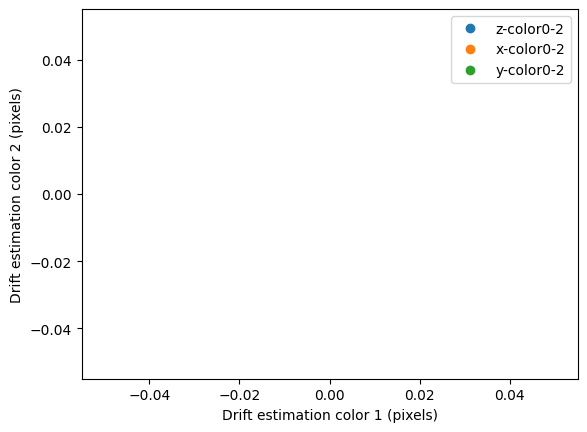

In [7]:
save_folder =r'\\192.168.0.21\bbfishdc21\HttHuman_Snonia__06_12_2023\MERFISH_Analysis_group1'
fov,set_ = 'Conv_zscan__30', '_set5'
dec = decoder_simple(save_folder,fov,set_)
dec.ncols=2
dec.load_decoded()
apply_fine_drift(dec,plt_val=True)
scoresRefT = get_score_per_color(dec)

In [ ]:
if False:
    if scoresRef is None: scoresRef=scoresRefT
    else: combine_scoresRef(scoresRef,scoresRefT)
    np.save(save_folder+os.sep+'scoresRef.npy',scoresRef)

### Given the base decoding for each fov, run across all datasets with consistent values

In [ ]:
from ioMicro import *
save_folder =r'\\192.168.0.6\bbfish1e3\DCBBL1_03_14_2023_big\MERFISH_Analysis'
scoresRef = np.load(save_folder+os.sep+'scoresRef.npy',allow_pickle=True)

In [ ]:
#elems = [('Conv_zscan__'+str(ifov).zfill(3),'_'+set_)for set_ in ['set2'] for ifov in dic_f[set_]]
for fov,set_ in tqdm(elems):
    save_final_decoding(save_folder,fov,set_,scoresRef,th=-1.5,plt_val=False,
                            tags_smFISH=['Aldh','Sox11'],
                            genes_smFISH=[['Igfbpl1','Aldh1l1','Ptbp1'],['Sox11','Sox2','Dcx']],Hths=None,force=True)

### Get counts per cell into a single dataset

In [ ]:
import pandas as pd
save_folder =r'\\192.168.0.6\bbfish1e3\DCBBL1_03_14_2023_big\MERFISH_Analysis'
#save_folder =r'\\192.168.0.6\bbfish1e3\DCBBL1_03_14_2023_big\MERFISH_Analysis'
save_fls = glob.glob(save_folder+os.sep+'finaldecs_*')

In [ ]:
save_fls_ = [fl for fl in save_fls if ('_set5' in fl)]# in fl if '035' in fl][0]
cell_df,df=None,None
for save_fl in tqdm(np.sort(save_fls_)[:]):
    ### load info
    dic = np.load(save_fl)
    XF = dic['XF']
    header = list(dic['header'])
    genes_decoded = dic['genes']
    cells = dic['cellinfo'][1:]
    header_cells = dic['header_cells']
    ### Rethrehold based on score
    iscore = list(header).index('score')
    scoreA = XF[:,iscore]
    keep = scoreA>-1.5
    ugns,gns_i = np.unique(genes_decoded[keep],return_inverse=True)

    icell = header.index('cell_id')
    icells = XF[keep,icell].astype(int)
    
    icellsf = cells[:,0].astype(int)
    
    mcell = np.max(icellsf)+1
    gn_cell,gn_cell_cts = np.unique(mcell*gns_i+icells,return_counts=True)
    len(gn_cell)
    igns_ = gn_cell//mcell
    icells_ = gn_cell%mcell
    Mcts = np.zeros([mcell,len(ugns)])
    Mcts[icells_,igns_]=gn_cell_cts

    Mcts[icellsf].shape
    ifov,iset = int(XF[0,header.index('ifov')]),int(XF[0,header.index('iset')])
    icellsnm = [icell+10**5*ifov for icell in icellsf]#icellsnm = [icell+10**5*ifov+10**9*iset for icell in icellsf]

    dfT = pd.DataFrame(Mcts[icellsf],columns=ugns,index=icellsnm)


    df = dfT if df is None else pd.concat([df,dfT])
    cell_dfT = pd.DataFrame(cells,columns=header_cells,index=icellsnm)
    cell_df = cell_dfT if cell_df is None else pd.concat([cell_df,cell_dfT])